## Modelos no lineales

Consideremos una situación donde se puede construir un modelo explicativo. En 1992, Deilly Press (periódico en Virgina USA), reportó algunas observaciones (datos) durante los últimos 50 años, sobre Cosechas de Vida en el Mar (HARVESTING SEA LIFE) en Chesapeake Bay. Examinemos diferentes escenarios usando observaciones desde a) Cosechas de pez Azúl y b) Cosechas de cangrejos azúles por la industria comercial Chesapeake Bay.

|Año |Pez Azul (lb)| Cangrejos (lb)|
|----|-------------|---------------|
|1940| 15000| 100000|
|1945| 150000| 850000|
|1950| 250000| 1330000|
|1955| 275000| 2500000|
|1960| 270000| 3000000|
|1965| 280000| 3700000|
|1970| 290000| 4400000|
|1975| 650000| 4660000|
|1980| 1200000| 4800000|
|1985| 1500000| 4420000|
|1990| 2750000 |5000000|

In [13]:
import numpy as np

# Datos
x_data = np.array ([1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990])
y_data = np.array( [15000, 150000, 250000, 275000, 270000, 280000, 290000, 650000, 1200000, 1500000, 2750000])

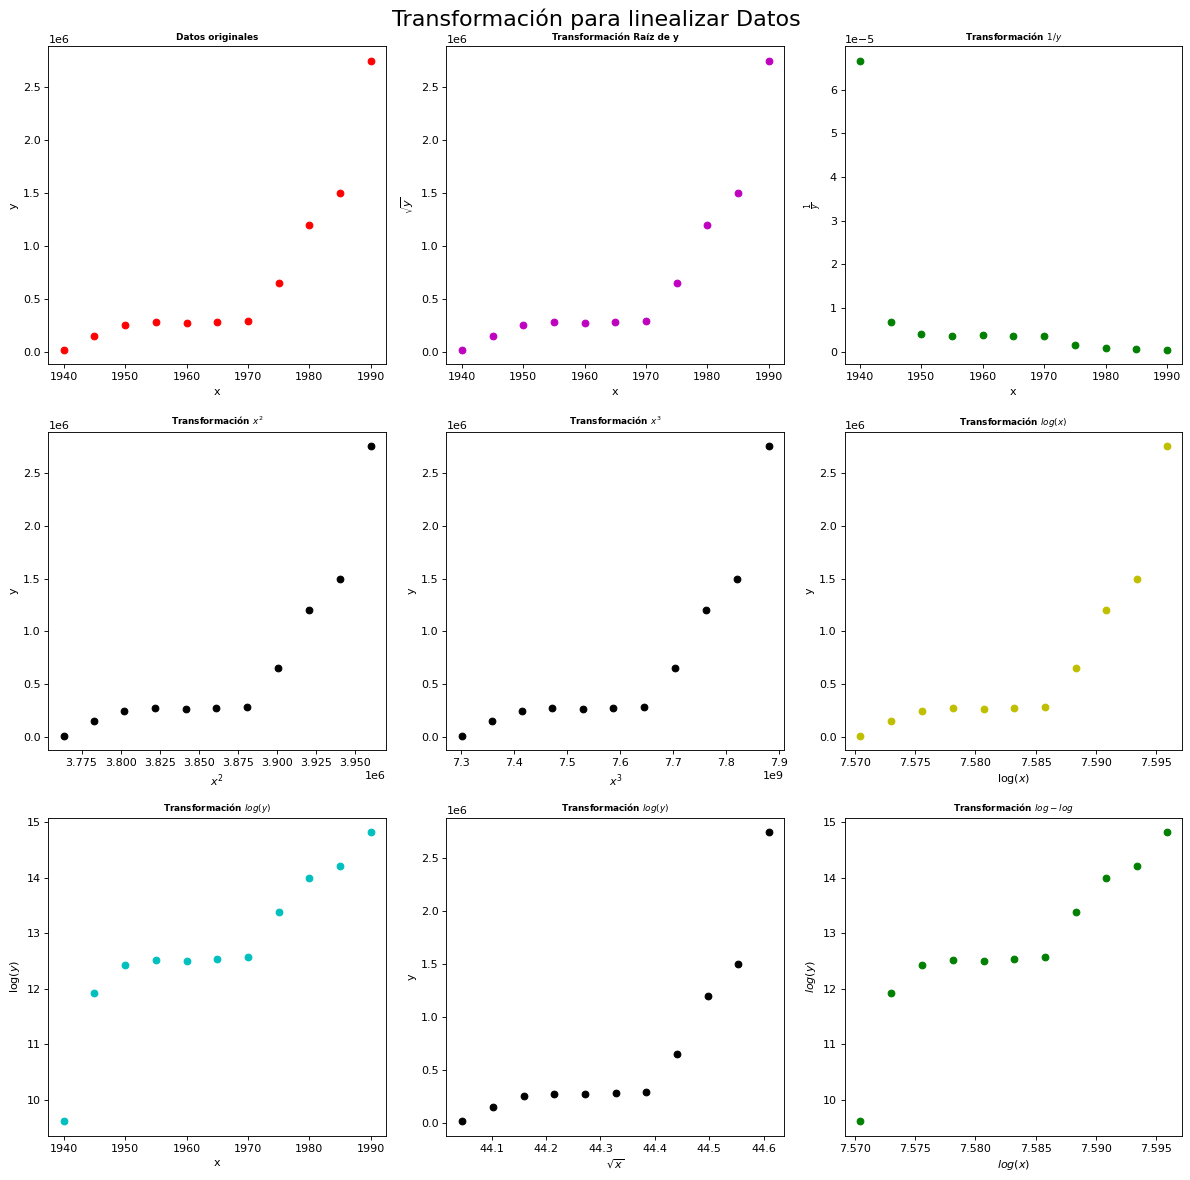

None


In [34]:
from Interpolacion_Ajuste.ModelosNoLineales.graficas import graficas_transformaciones
print(graficas_transformaciones(x_data, y_data))

Las transformaciones que tienen "Tendencia a una linea recta son: $(x, \sqrt{y})$, ($x, \frac1y$), ($x, log(y)$) y la escala ($log(x), log(y)$)"

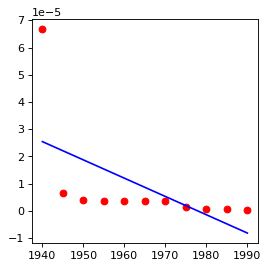

In [15]:
from Interpolacion_Ajuste.MinimosCuadrados.minimos_cuadrados import minimos_cuadrados
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8), dpi=80)
#PRIMERA TRANSFORMACIÓN
plt.subplot(221)
plt.plot(x_data, 1/y_data, 'or')
m1, b1 = minimos_cuadrados(x_data, 1/y_data)
P = lambda x: m1*x + b1

ux = np.linspace(x_data.min(), x_data.max(), 2)
plt.plot(ux, P(ux), color='b', label='$\\frac{1}{y}$')

la pendiente es -6.717570610047142e-07, y el intersepto es 0.0013286476433296372, y el coeficiente de linealizacion es 0.33198336679934237


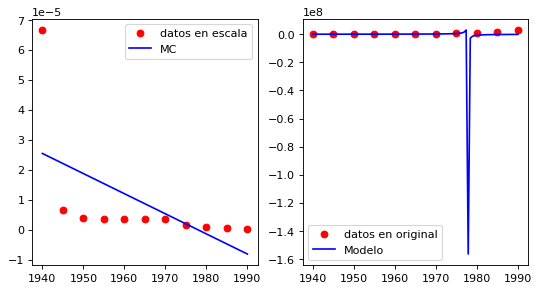

In [21]:
from Interpolacion_Ajuste.ModelosNoLineales.coeficiente_determinacion import coef_determinacion

# Modelo1: escala x vs 1/y

r2_1 = coef_determinacion(m1, b1, x_data, 1/y_data)
m1, b1 = minimos_cuadrados(x_data, 1/y_data)

print(f"la pendiente es {m1}, y el intersepto es {b1}, y el coeficiente de linealizacion es {r2_1}")

line_1 = lambda x: m1 * x + b1
model_1 = lambda x: 1 / (m1 * x + b1)

ux = np.linspace(x_data.min(), x_data.max(), 100)

plt.figure(figsize=(8,4), dpi=80)
plt.subplot(121)
plt.plot(x_data, 1/y_data, 'or', label= "datos en escala")
plt.plot(ux, line_1(ux), color='b', label= "MC")
plt.legend()
plt.subplot(122)
plt.plot(x_data, y_data, 'or', label= "datos en original")
plt.plot(ux, model_1(ux), color='b', label= "Modelo")

plt.legend()
plt.show()

 la pendiente es 24.359736313162756, y el intercepto es -47148.13754741574, el coeficiente de linealizacion es: 0.837927521561491


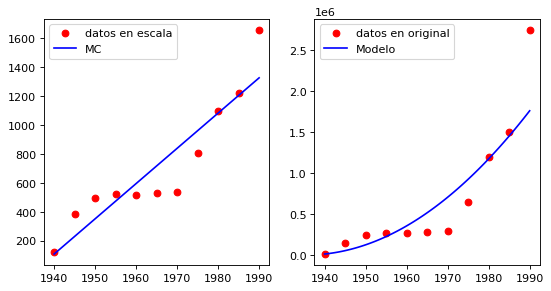

In [22]:
m2, b2 = minimos_cuadrados(x_data, np.sqrt(y_data))
r2_2 = coef_determinacion(m2,b2,x_data,np.sqrt(y_data))

print(f" la pendiente es {m2}, y el intercepto es {b2}, el coeficiente de linealizacion es: {r2_2}")

line_2 = lambda x: m2 * x + b2
model_2 = lambda x:  (m2 * x + b2)**2
ux = np.linspace(x_data.min(), x_data.max(), 100)

plt.figure(figsize=(8,4), dpi=80)
plt.subplot(121)
plt.plot(x_data, np.sqrt(y_data), 'or', label= "datos en escala")
plt.plot(ux, line_2(ux), color='b', label= "MC")
plt.legend()
plt.subplot(122)
plt.plot(x_data, y_data, 'or', label= "datos en original")
plt.plot(ux, model_2(ux), color='b', label= "Modelo")

plt.legend()
plt.show()

 la pendiente es 0.07593559921442046, y el intercepto es -136.4366393798639, el coeficiente de linealizacion es: -369403.254518431


C:\Users\USER\AppData\Local\Temp\ipykernel_18200\3253769137.py:7: RuntimeWarning: overflow encountered in exp
  model_3 = lambda x:  np.exp(m2 * x + b2)


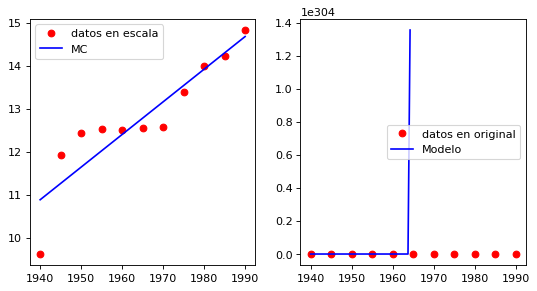

In [28]:
m3, b3 = minimos_cuadrados(x_data, np.log(y_data))
r2_3 = coef_determinacion(m2, b2, x_data, np.log(y_data))

print(f" la pendiente es {m3}, y el intercepto es {b3}, el coeficiente de linealizacion es: {r2_3}")

line_3 = lambda x: m3 * x + b3
model_3 = lambda x: np.exp(m2 * x + b2)

ux = np.linspace(x_data.min(), x_data.max(), 100)

plt.figure(figsize=(8,4), dpi=80)
plt.subplot(121)
plt.plot(x_data, np.log(y_data), 'or', label= "datos en escala")
plt.plot(ux, line_3(ux), color='b', label= "MC")
plt.legend()
plt.subplot(122)
plt.plot(x_data, y_data, 'or', label= "datos en original")
plt.plot(ux, model_3(ux), color='b', label= "Modelo")

plt.legend()
plt.show()

La pendiente es 149.25020246240177, el intercepto es -1119.01958327108, y el coeficiente de linealización es: 0.8250430292323422


C:\Users\USER\AppData\Local\Temp\ipykernel_18200\1279272411.py:8: RuntimeWarning: overflow encountered in power
  model_4 = lambda x: np.exp(b4) * x**m4
C:\Users\USER\AppData\Local\Temp\ipykernel_18200\1279272411.py:8: RuntimeWarning: invalid value encountered in multiply
  model_4 = lambda x: np.exp(b4) * x**m4


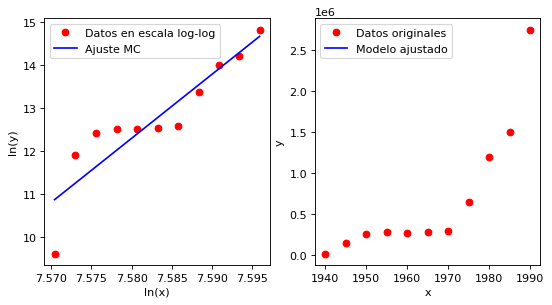

In [45]:
# Modelo 4: Escala log(x) vs log(y)
m4, b4 = minimos_cuadrados(np.log(x_data), np.log(y_data))
r2_4 = coef_determinacion(m4, b4, np.log(x_data), np.log(y_data))

print(f"La pendiente es {m4}, el intercepto es {b4}, y el coeficiente de linealización es: {r2_4}")

line_4 = lambda x: m4 * x + b4
model_4 = lambda x: np.exp(b4) * x**m4

ux_log = np.linspace(np.log(x_data).min(), np.log(x_data).max(), 100)
ux = np.linspace(x_data.min(), x_data.max(), 100)

plt.figure(figsize=(8, 4), dpi=80)

# Gráfica en escala log-log
plt.subplot(121)
plt.plot(np.log(x_data), np.log(y_data), 'or', label="Datos en escala log-log")
plt.plot(ux_log, line_4(ux_log), color='b', label="Ajuste MC")
plt.xlabel("ln(x)")
plt.ylabel("ln(y)")
plt.legend()

# Gráfica en escala original
plt.subplot(122)
plt.plot(x_data, y_data, 'or', label="Datos originales")
plt.plot(ux, model_4(ux), color='b', label="Modelo ajustado")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()
